In [1]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import matplotlib.pyplot as plt

#Load the modules
import Extractors as e
import Classifiers as c
import DoyleMLToolkit as dmlt

#Make sure they get reloaded after changes
e = reload(e)
c = reload(c)
dmlt = reload(dmlt)

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Define high order models to generate accurate variances

order = 80
CancerModels = [
    dmlt.Model(e.ComplexFourier,c.NaiveBayesReal,order,0),
    #dmlt.Model(e.Chebyshev,c.NaiveBayesReal,order,0),
    dmlt.Model(e.Bernstein,c.NaiveBayesReal,order,0)
]


#Load relevant data

KidneyData = [model.load("kidney_final/KidneyClass.csv","kidney_final/KidneyData.csv") for model in CancerModels]

#Generate variances
varReal = []
varImag = []
zeroth = 0
for model in KidneyData:
    varReal.append(model.getVariances(0,0,zeroth))
    varImag.append(model.getVariances(1,0,zeroth))

#Replace each array with a set of tuples (index,value) of the n highest variances
n = 3
for model in range(len(varReal)):
    tmp1 = []
    tmp2 = []
    for i in range(n):
        tmp1.append((varReal[model].index(max(varReal[model])),max(varReal[model])))
        varReal[model][tmp1[-1][0]] = -1
        
        tmp2.append((varImag[model].index(max(varImag[model])),max(varImag[model])))
        varImag[model][tmp2[-1][0]] = -1
    varReal[model] = tmp1
    varImag[model] = tmp2

for i in range(len(varReal)):
    print varReal[i]
    print varImag[i]
    print ''

[(0, 0.58211650300320261), (1, 0.18017867397992229), (2, 0.069674976954948648)]
[(0, 0.93399984717549478), (1, 0.055186187862072252), (2, 0.0021856903183661972)]

[(10, 0.18843601134920124), (11, 0.15783870095134633), (12, 0.12310049857353056)]
[(78, 0.02522951097778765), (77, 0.02422157289097536), (76, 0.023381922074157385)]



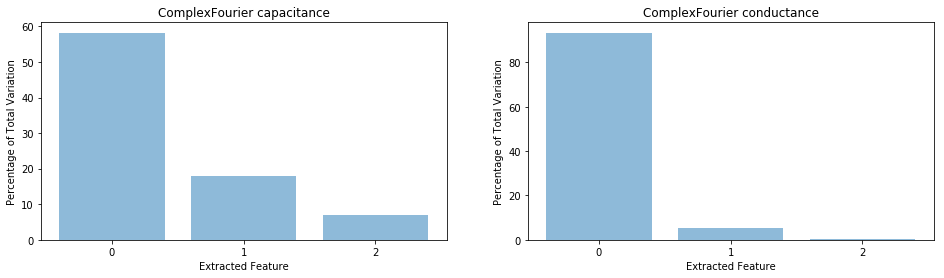

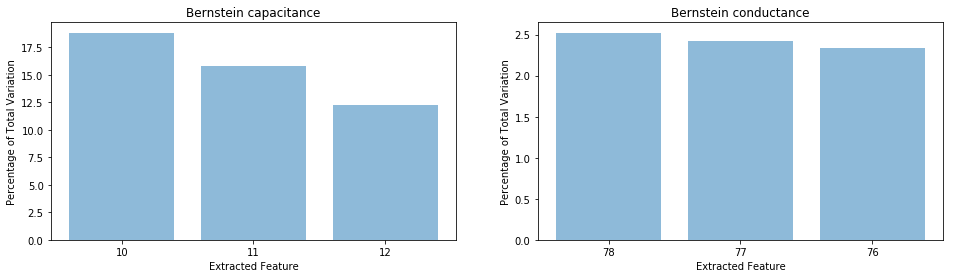

In [3]:
#Plot variances
pylab.rcParams['figure.figsize'] = (16, 4)


for model in range(len(KidneyData)):
    #Real
    objects = [str(i[0]) for i in varReal[model]]
    y_pos = np.arange(len(objects))
    performance = [100*i[1] for i in varReal[model]]

    plt.subplot(121)
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Percentage of Total Variation')
    plt.xlabel('Extracted Feature')
    plt.title(CancerModels[model].C.name+' capacitance')

    #Imaginary
    objects = [str(i[0]) for i in varImag[model]]
    y_pos = np.arange(len(objects))
    performance = [100*i[1] for i in varImag[model]]

    plt.subplot(122)
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Percentage of Total Variation')
    plt.xlabel('Extracted Feature')
    plt.title(CancerModels[model].C.name+' conductance')

    plt.show()

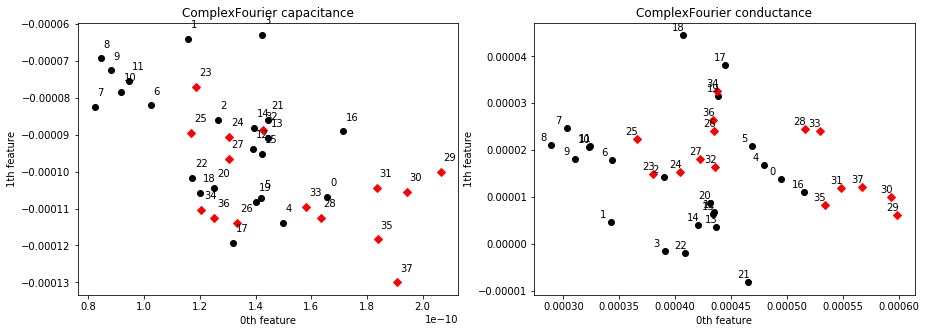

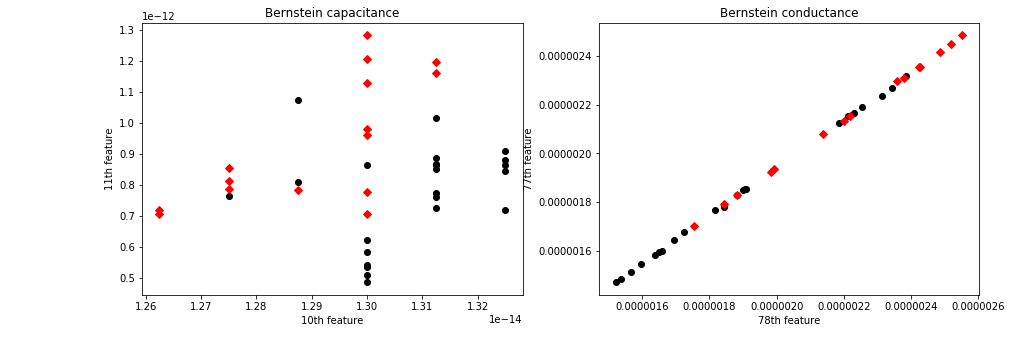

In [4]:
#Component plots
pylab.rcParams['figure.figsize'] = (15, 5)


for model in range(len(KidneyData)):
    #Real
    imaginary = 0
    classes = sorted(list(set(KidneyData[model].getAllY())))
    colors = ['red','orange','yellow','green','blue']

    x = 0
    y = 0
    plt.subplot(121)
    for row in range(len(KidneyData[model].getAllFeatures()[0])):
        x = KidneyData[model].getFeaturesBySweep(row,0,imaginary)[varReal[model][0][0]]
        y = KidneyData[model].getFeaturesBySweep(row,0,imaginary)[varReal[model][1][0]]
        if KidneyData[model].getAllY()[row] == "Cancer":
            plt.plot([x],[y],color='#ff0000',marker='D',linewidth=0)
        else:
            plt.plot([x],[y],color='#000000',marker='o',linewidth=0)
        plt.annotate(str(row),(x+(1e-12),y+(3e-6)))

    plt.title(CancerModels[model].C.name+" capacitance")
    plt.xlabel("%dth feature"%varReal[model][0][0])
    plt.ylabel("%dth feature"%varReal[model][1][0])

    #Imaginary
    imaginary = 1
    classes = sorted(list(set(KidneyData[model].getAllY())))
    colors = ['red','orange','yellow','green','blue']

    x = 0
    y = 0
    plt.subplot(122)
    for row in range(len(KidneyData[model].getAllFeatures()[0])):
        x = KidneyData[model].getFeaturesBySweep(row,0,imaginary)[varImag[model][0][0]]
        y = KidneyData[model].getFeaturesBySweep(row,0,imaginary)[varImag[model][1][0]]
        if KidneyData[model].getAllY()[row] == "Cancer":
            plt.plot([x],[y],color='#ff0000',marker='D',linewidth=0)
        else:
            plt.plot([x],[y],color='#000000',marker='o',linewidth=0)
        plt.annotate(str(row),(x-(1e-5),y+(0.9e-6)))

    plt.title(CancerModels[model].C.name+" conductance")
    plt.xlabel("%dth feature"%varImag[model][0][0])
    plt.ylabel("%dth feature"%varImag[model][1][0])
    plt.show()

In [5]:
#Redefine models at low orders to make actual classifications

CancerModels = [
    dmlt.Model(e.ComplexFourier,c.NaiveBayesReal,3,1),
    #dmlt.Model(e.Chebyshev,c.NaiveBayesReal,3,1),
    dmlt.Model(e.Bernstein,c.NaiveBayesReal,3,1)
]



#Load relevant data

KidneyData = [model.load("kidney_final/KidneyClass.csv","kidney_final/KidneyData.csv") for model in CancerModels]

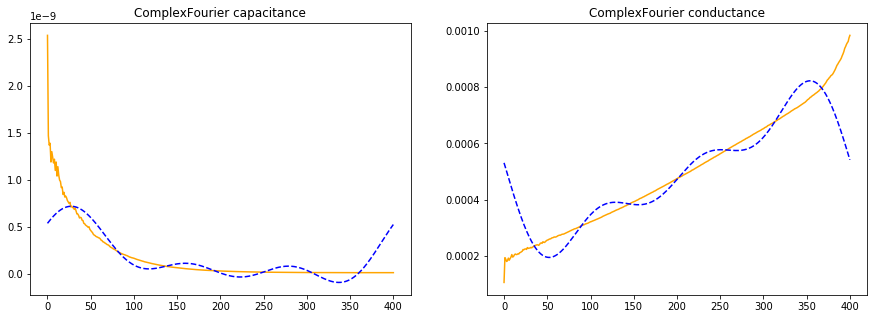

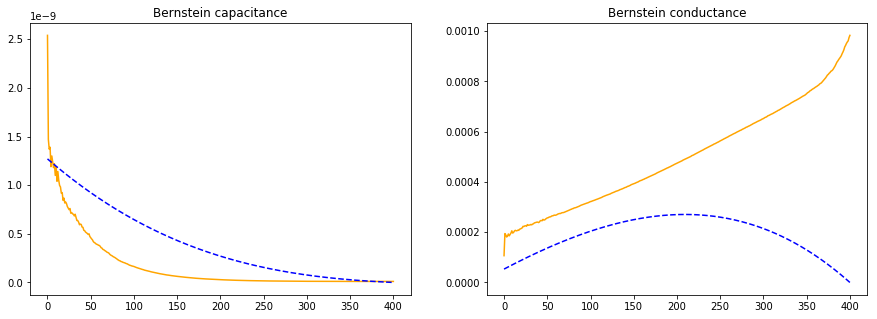

In [6]:
#Reconstructed plots

for model in range(len(KidneyData)):
    #Real
    imaginary = 0
    plt.subplot(121)
    plt.title(CancerModels[model].C.name+" capacitance")
    CancerModels[model].plotSample(KidneyData[model],0,'orange',imaginary)
    CancerModels[model].plotApproximation(KidneyData[model],0,'b--',imaginary)

    #Imaginary
    imaginary = 1
    plt.subplot(122)
    plt.title(CancerModels[model].C.name+" conductance")
    CancerModels[model].plotSample(KidneyData[model],0,'orange',imaginary)
    CancerModels[model].plotApproximation(KidneyData[model],0,'b--',imaginary)
    plt.show()

In [7]:
#Redefine models at without zeroth to make actual classifications

CancerModels = [
    dmlt.Model(e.ComplexFourier,c.NaiveBayesReal,order,zeroth),
    #dmlt.Model(e.Chebyshev,c.NaiveBayesReal,order,zeroth),
    dmlt.Model(e.Bernstein,c.NaiveBayesReal,order,zeroth),
    
    dmlt.Model(e.ComplexFourier,c.NaiveBayesImag,order,zeroth),
    #dmlt.Model(e.Chebyshev,c.NaiveBayesImag,order,zeroth),
    dmlt.Model(e.Bernstein,c.NaiveBayesImag,order,zeroth),


    dmlt.Model(e.ComplexFourier,c.NBKernelReal,order,zeroth),
    #dmlt.Model(e.Chebyshev,c.NBKernelReal,order,zeroth),
    dmlt.Model(e.Bernstein,c.NBKernelReal,order,zeroth),

    dmlt.Model(e.ComplexFourier,c.NBKernelImag,order,zeroth),
    #dmlt.Model(e.Chebyshev,c.NBKernelImag,order,zeroth),
    dmlt.Model(e.Bernstein,c.NBKernelImag,order,zeroth)
]


#Load relevant data

KidneyData = [model.load("kidney_final/KidneyClass.csv","kidney_final/KidneyData.csv") for model in CancerModels]

ComplexFourier
Naive Bayes Real
15.0 8.0
6.0 9.0
[0.631578947368421, 0.5294117647058824, 0.6, 0.5625]

Bernstein
Naive Bayes Real
20.0 3.0
5.0 10.0
[0.7894736842105263, 0.7692307692307693, 0.6666666666666666, 0.7142857142857143]

ComplexFourier
Naive Bayes Imaginary
19.0 4.0
8.0 7.0
[0.6842105263157895, 0.6363636363636364, 0.4666666666666667, 0.5384615384615384]

Bernstein
Naive Bayes Imaginary
16.0 7.0
5.0 10.0
[0.6842105263157895, 0.5882352941176471, 0.6666666666666666, 0.625]

ComplexFourier
Kernel Density Estimation Real


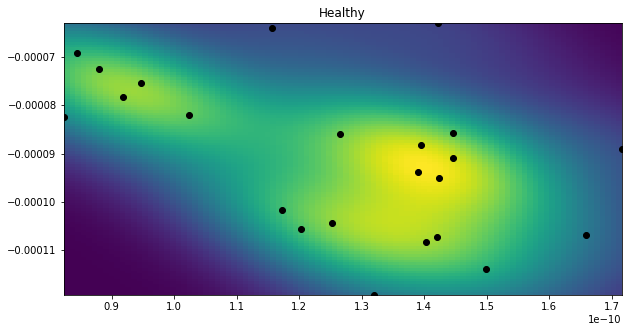

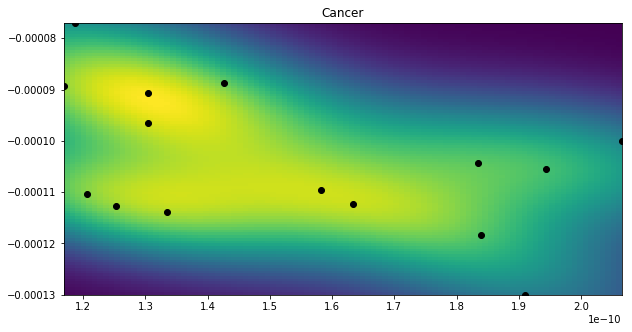

15.0 8.0
8.0 7.0
[0.5789473684210527, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667]

Bernstein
Kernel Density Estimation Real


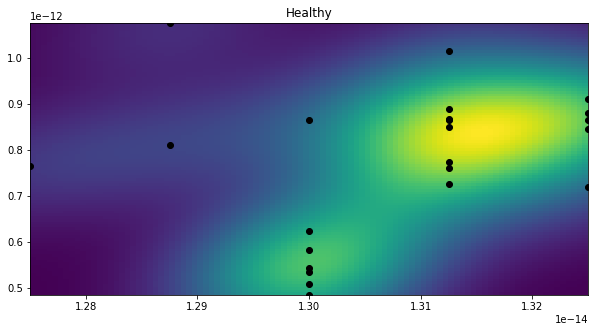

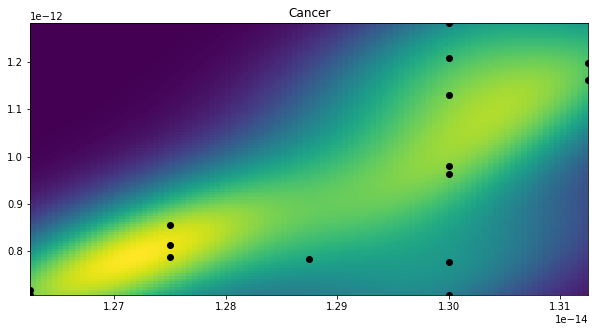

18.0 5.0
2.0 13.0
[0.8157894736842105, 0.7222222222222222, 0.8666666666666667, 0.787878787878788]

ComplexFourier
Kernel Density Estimation Imaginary


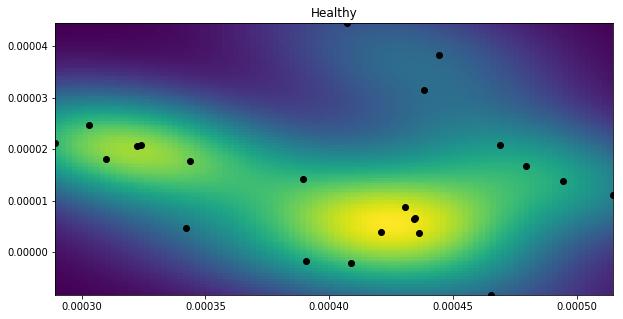

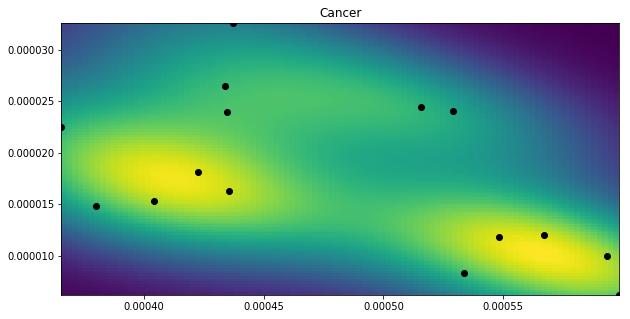

17.0 6.0
2.0 13.0
[0.7894736842105263, 0.6842105263157895, 0.8666666666666667, 0.7647058823529413]

Bernstein
Kernel Density Estimation Imaginary


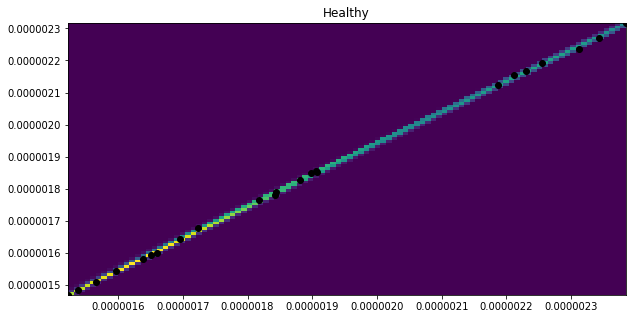

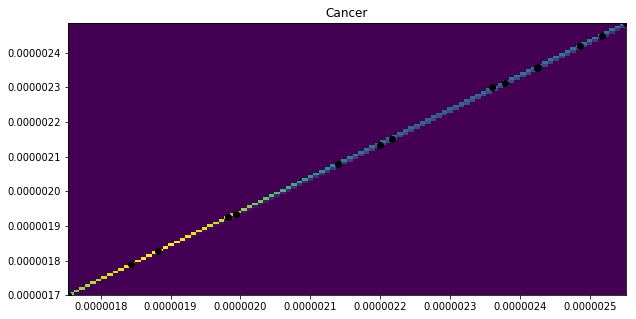

14.0 9.0
1.0 14.0
[0.7368421052631579, 0.6086956521739131, 0.9333333333333333, 0.7368421052631579]



In [12]:
pylab.rcParams['figure.figsize'] = (10, 5)

#Test model
var = []
n = 2
for j in range(2):
    for i in range(n):
        var.append(varReal[i])
    for i in range(n):
        var.append(varImag[i])

for model in range(len(CancerModels)):
    CancerModels[model].train(KidneyData[model],[])
    print CancerModels[model].C.name
    print CancerModels[model].L.name
    feats = [var[model][0][0],var[model][1][0]]
    #print feats
    CancerModels[model].train(KidneyData[model],[],feats,1)
    #CancerModels[model].predict(KidneyData[model],KidneyData[model].getAllY())
    print CancerModels[model].test(KidneyData[model],'Cancer',feats)
    print ''

In [9]:
# X = range(2,101)
# Y = []
# m = 0
# j = -1
# for o in X:
#     order = o-zeroth
#     CancerModels = [
#         dmlt.Model(e.ComplexFourier,c.NBKernelReal,order,zeroth),
#         dmlt.Model(e.Bernstein,c.NBKernelReal,order,zeroth),

#         dmlt.Model(e.ComplexFourier,c.NBKernelImag,order,zeroth),
#         dmlt.Model(e.Bernstein,c.NBKernelImag,order,zeroth)
#     ]


#     #Load relevant data

#     KidneyData = [model.load("kidney_final/KidneyClass.csv","kidney_final/KidneyData.csv") for model in CancerModels]

#     model = 3
#     try:
#         CancerModels[model].train(KidneyData[model],[],0)
#         print o
#         Y.append(CancerModels[model].test(KidneyData[model],'Cancer')[0])
#         if Y[-1] > m:
#             m = Y[-1]
#             j = o
#     except:
#         print "error"
#         Y.append(0)
#         continue
# print j,m
# plt.plot(X,Y)
# plt.show()

In [10]:
# def a(n,row,center):
#     order = 80
#     T = KidneyData[0].length
#     w = (2*np.pi)/T
#     coef = 1.0/np.math.factorial(n)
#     zero = 0 #KidneyData[0].getFeaturesBySweep(row)[0]
#     positive = sum([KidneyData[0].getFeaturesBySweep(row,0,-1,0)[j]*((1j*j*w)**n)*(np.e**(1j*j*w*center)) for j in range(1,order+1)])
#     negative = sum([KidneyData[0].getFeaturesBySweep(row,0,-1,1)[j]*((1j*(-j)*w)**n)*(np.e**(1j*j*w*center)) for j in range(1,order+1)])
#     return coef*(zero+negative+positive)

# row = 0
# center = 0.0
# degree = 100
# print KidneyData[0].getFeaturesBySweep(row)[:3]
# print [a(n,row,center) for n in range(degree)][:3]

# CancerModels[0].plotSample(KidneyData[0],row,'#ff0000',0)
# CancerModels[0].plotApproximation(KidneyData[0],row,'#00ff00',0)
# plt.plot(range(401),[sum([a(i,row,center)*((x-center)**i) for i in range(degree)]) for x in range(401)])
# plt.ylim([0.0,2.5e-9])
# plt.show()

In [11]:
# #Plot all the data

# pylab.rcParams['figure.figsize'] = (15, 8)

# imaginary = 0
# row = 0
# # plt.xscale('log')
# # plt.yscale('log')
# #plt.ylim([-10,10])
# #plt.xlim([0,1])
# # for row in range(23):
# #     CancerModels[0].plotSample(KidneyData[0],row,"#00ff00",imaginary)
# #     CancerModels[0].plotApproximation(KidneyData[0],row,"#00ff00",imaginary)
# # for row in range(23,38):
# #     CancerModels[0].plotSample(KidneyData[0],row,"r",imaginary)
# #     CancerModels[0].plotApproximation(KidneyData[0],row,"r",imaginary)
# CancerModels[1].plotSample(KidneyData[1],row,"b",imaginary)
# CancerModels[1].plotApproximation(KidneyData[1],row,"r",imaginary)
# plt.show()
    
# # imaginary = 1
# # # plt.xscale('log')
# # # plt.yscale('log')
# # # plt.xlim([10**4,10**8])
# # plt.ylim([9*10**-5,10**-3])
# # for row in range(23):
# #     CancerModels[0].plotSample(KidneyData[0],row,"#00ff00",imaginary)
# # for row in range(23,38):
# #     CancerModels[0].plotSample(KidneyData[0],row,"r",imaginary)
# # plt.show()